In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1')

In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3916,ham,Eh ur laptop got no stock lei... He say mon mu...,NaN,NaN,NaN
579,ham,Arngd marriage is while u r walkin unfortuntly...,NaN,NaN,NaN
1571,ham,Near kalainar tv office.thenampet,NaN,NaN,NaN
3052,ham,Pls send me the correct name da.,NaN,NaN,NaN
4670,ham,"Probably not, I'm almost out of gas and I get ...",NaN,NaN,NaN


In [4]:
print(df.shape)

(5572, 5)


### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Since last 3 columns have very less non-null values, we can drop them

In [7]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True,axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.sample(5)

,v1,v2
4518,ham,Just got part Nottingham - 3 hrs 63miles. Good...
2229,ham,haha but no money leh... Later got to go for t...
4486,ham,Miss call miss call khelate kintu opponenter m...
282,ham,Ok. I asked for money how far
1947,ham,The battery is for mr adewale my uncle. Aka Egbon


In [10]:
df.rename(columns={'v1':'label', 'v2':'message'},inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['label']=encoder.fit_transform(df['label'])
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.sample(5)

,label,message
3225,0,"Rose for red,red for blood,blood for heart,hea..."
3397,0,It only does simple arithmetic not percentages.
1184,0,"Yo, you around? Just got my car back"
5473,0,Ok lor Ì_ reaching then message me.
3116,0,Now am free call me pa.


In [14]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [18]:
df.sample(10)

,label,message
2447,0,Tmr then Ì_ brin lar... Aiya later i come n c ...
5317,0,"K, fyi I'm back in my parents' place in south ..."
1613,0,Thnx dude. u guys out 2nite?
5406,0,Dear are you angry i was busy dear
3078,0,*deep sigh* ... I miss you :-( ... I am really...
452,0,K:)k:)what are detail you want to transfer?acc...
1098,0,NO GIFTS!! You trying to get me to throw mysel...
2886,0,K I'll take care of it
3413,0,No pic. Please re-send.
2029,0,Thanx but my birthday is over already.


In [19]:
## Exploratory Data Analysis

In [20]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [21]:
x,y=df['label'].value_counts()
print('Ham:',x)
print('Spam:',y)

Ham: 4516
Spam: 653


([<matplotlib.patches.Wedge at 0x16a597710>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37%'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63%')])

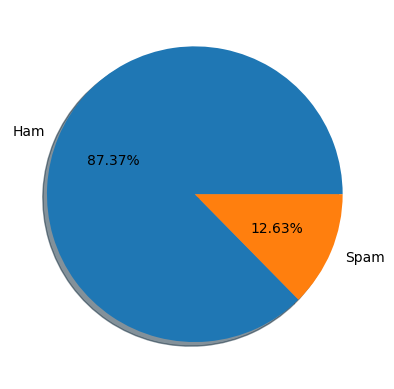

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f%%',shadow=True)

In [23]:
# We have less nummber of spam messages compared to ham messages in the dataset
# imbalance in the data.

In [24]:
# To count the number of characters, words and sentences.

In [25]:
! pip install nltk

In [26]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jaychopra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/jaychopra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['num_characters']=df['message'].apply(len)

In [29]:
df.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df.sample(5)

,label,message,num_characters,num_words,num_sentences
810,0,S:)s.nervous &lt;#&gt; :),26,13,1
3632,0,Hui xin is in da lib.,21,7,1
3325,0,Huh so fast... Dat means u havent finished pai...,52,11,1
3714,0,"I am late,so call you tomorrow morning.take ca...",92,21,1
1531,0,Oh dang! I didn't mean o send that to you! Lol!,47,15,3


In [35]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# For ham messages
df[df['label']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# For spam messages
df[df['label']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
# one clear observation is that spam messages have more number of characters, words and sentences compared to ham messages.

In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

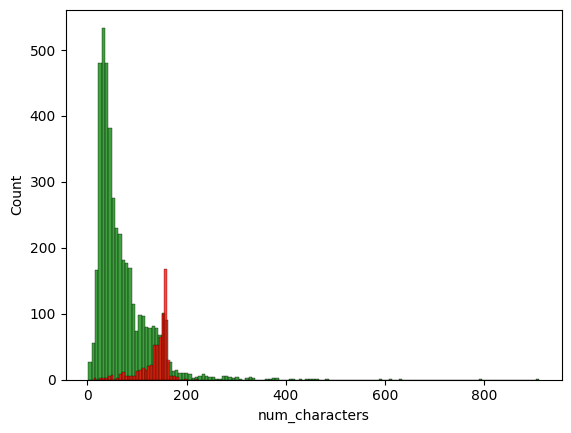

In [40]:
sns.histplot(df[df['label']==0]['num_characters'],color='green')
sns.histplot(df[df['label']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

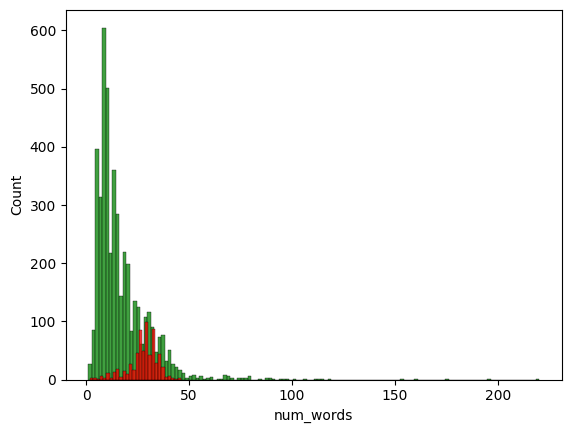

In [41]:
sns.histplot(df[df['label']==0]['num_words'],color='green')
sns.histplot(df[df['label']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

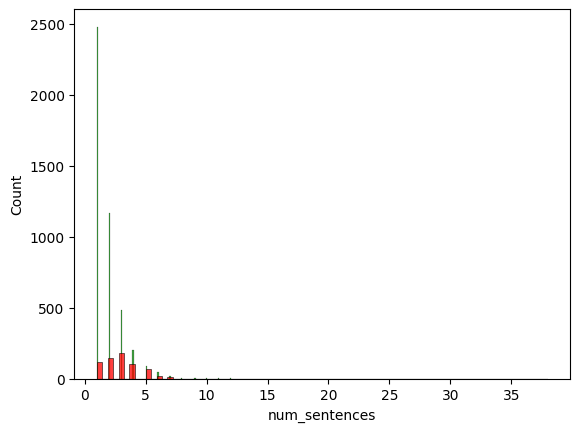

In [42]:
sns.histplot(df[df['label']==0]['num_sentences'],color='green')
sns.histplot(df[df['label']==1]['num_sentences'],color='red')

<Figure size 900x300 with 0 Axes>

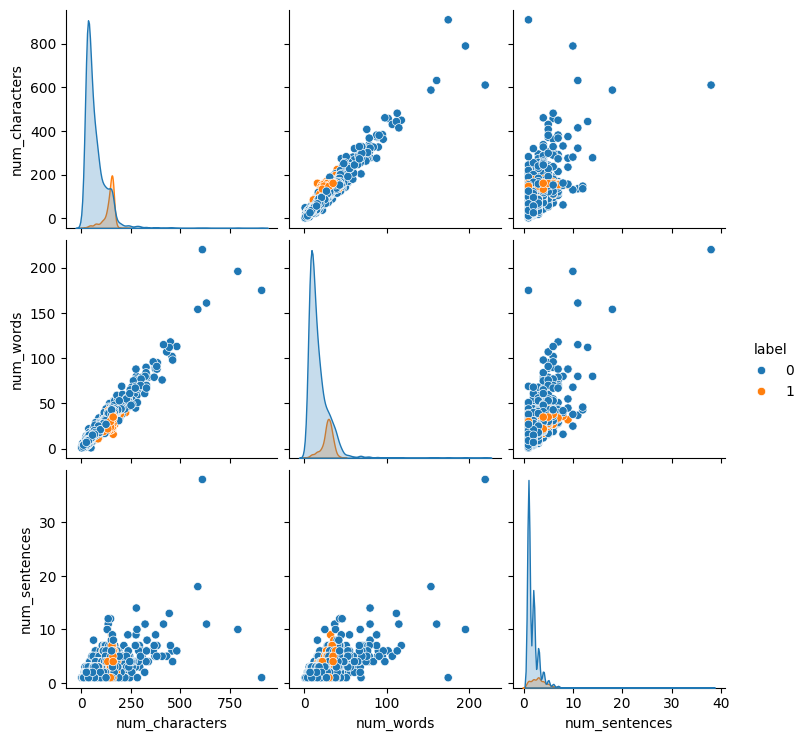

In [43]:
plt.figure(figsize=(9,3))
sns.pairplot(df,hue='label')

In [44]:
df.corr

<bound method DataFrame.corr of       label                                            message  \
0         0  Go until jurong point, crazy.. Available only ...   
1         0                      Ok lar... Joking wif u oni...   
2         1  Free entry in 2 a wkly comp to win FA Cup fina...   
3         0  U dun say so early hor... U c already then say...   
4         0  Nah I don't think he goes to usf, he lives aro...   
...     ...                                                ...   
5567      1  This is the 2nd time we have tried 2 contact u...   
5568      0              Will Ì_ b going to esplanade fr home?   
5569      0  Pity, * was in mood for that. So...any other s...   
5570      0  The guy did some bitching but I acted like i'd...   
5571      0                         Rofl. Its true to its name   

      num_characters  num_words  num_sentences  
0                111         24              2  
1                 29          8              2  
2                155        

### Data Preprocessing

#### Define a Function which will perform the text preprocessing tasks.
1. convert the text in lower case
2. convert it into tokens
3. remove the special characters and keep only alphanumerics in the list
4. remove the stopwords(unnecessary words) and punctuations
5. stemming (same meaning words are converted to the root form)

In [45]:
import string 

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaychopra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [47]:
df['message'][6]

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [48]:
transform_text('Even my brother is not like to speak with me. They treat me like aids patent.')

'even brother like speak treat like aid patent'

In [49]:
df['transformed_text']=df['message'].apply(transform_text)

In [50]:
df.head()

,label,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
! pip install wordcloud

In [52]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [53]:
spam_wc=wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))

### Most common spam messages 

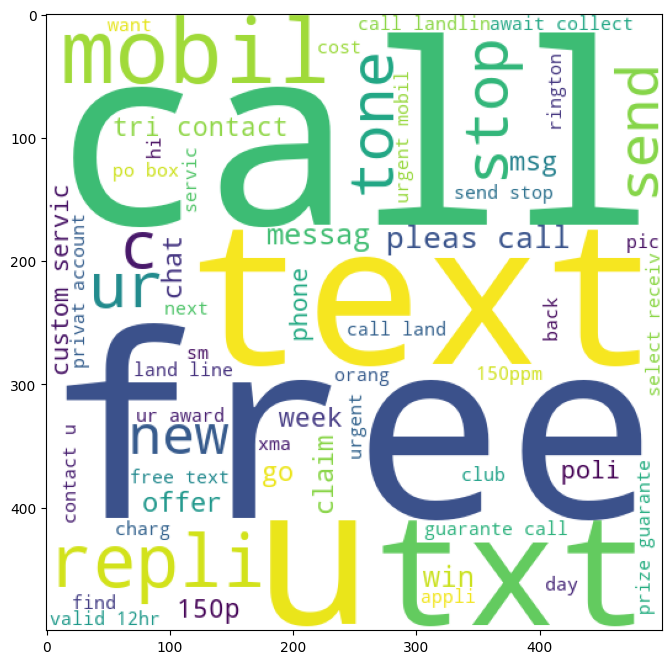

In [54]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [61]:
ham_wc=wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))

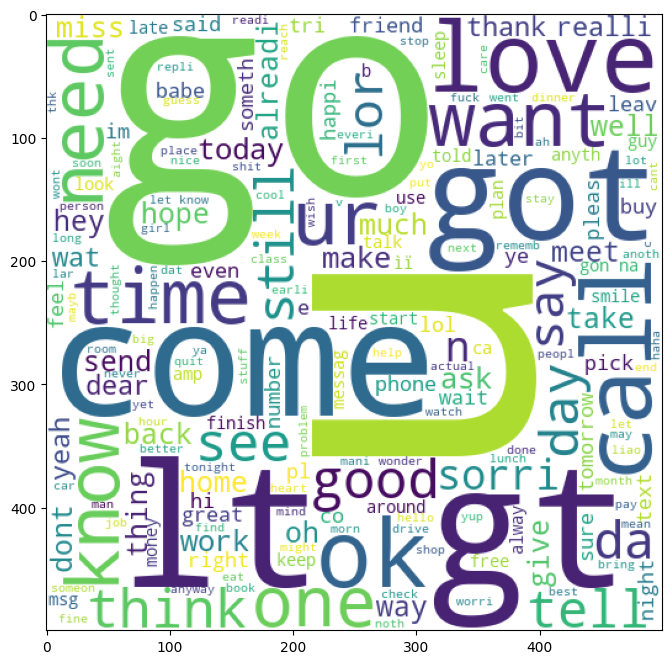

In [62]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [55]:
spam_corpus=[]
for msg in (df[df['label']==1]['transformed_text'].tolist()) :
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia')])

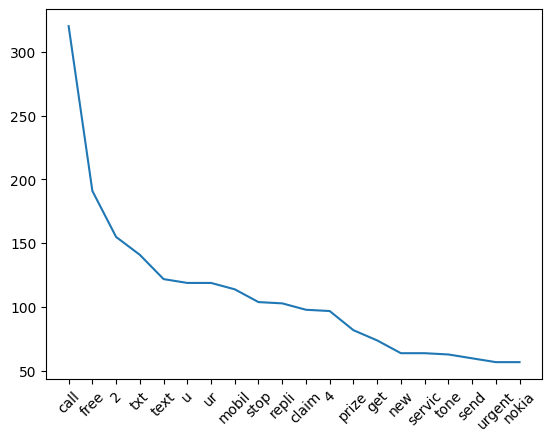

In [57]:
from collections import Counter
plt.plot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation=45)


In [58]:
ham_corpus=[]
for msg in (df[df['label']==0]['transformed_text'].tolist()) :
    for word in msg.split():
        ham_corpus.append(word)

In [63]:
len(ham_corpus)

35404

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one')])

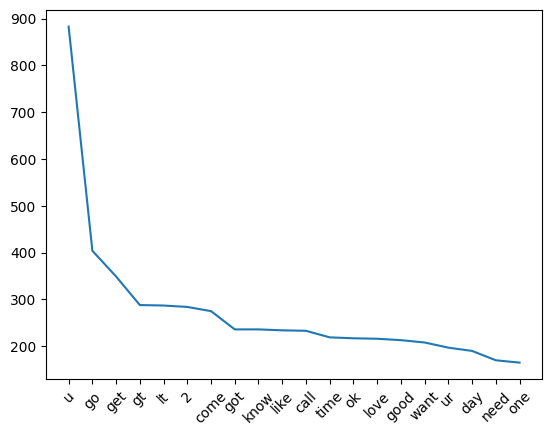

In [66]:
from collections import Counter
plt.plot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation=45)


### Model Building

#### We are using Naive Bayes model for our spam classifier as it's a textual data.

In [86]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [87]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [88]:
X.shape

(5169, 6708)

In [89]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
Y=df['label'].values

In [91]:
Y.shape

(5169,)

In [92]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [95]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [96]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [97]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [98]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [100]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


##### since precision score matters here therefore we will choose multinomial naive bayse for our project

In [101]:
# tfidf vectorizer and MultinomialNB gives the best accuracy and precision score.

#### Let's try some other classification models to check their precision and accuracy.

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [105]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [106]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [107]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [108]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [109]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [110]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [111]:
# From the above table, we can see that MultinomialNB gives the best accuracy and precision score.

In [112]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [113]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


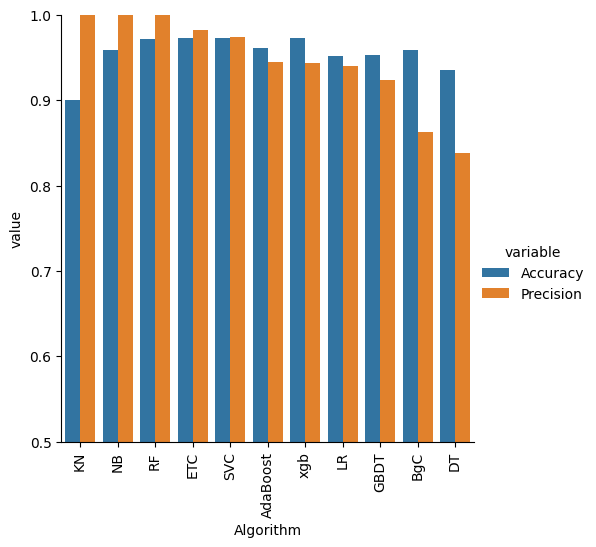

In [114]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [115]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))